In [2]:
#Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [4]:
#Load Both Datasets

# Adjust file names/extensions if your files are .xlsx
bank = pd.read_csv("bank.csv", sep=";")
bank_full = pd.read_csv("bank-full.csv", sep=";")

print("bank.csv shape:", bank.shape)
print("bank-full.csv shape:", bank_full.shape)


bank.csv shape: (4521, 17)
bank-full.csv shape: (45211, 17)


In [6]:
#Preprocess (for both)

def preprocess(df):
    df_encoded = pd.get_dummies(df, drop_first=True)
    X = df_encoded.drop("y_yes", axis=1)
    y = df_encoded["y_yes"]
    return train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess both
X_train_1, X_test_1, y_train_1, y_test_1 = preprocess(bank)
X_train_2, X_test_2, y_train_2, y_test_2 = preprocess(bank_full)


In [8]:
#Train Models
model_1 = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_2 = DecisionTreeClassifier(criterion="entropy", random_state=42)

model_1.fit(X_train_1, y_train_1)
model_2.fit(X_train_2, y_train_2)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
#Evaluate & Compare

# Predictions
y_pred_1 = model_1.predict(X_test_1)
y_pred_2 = model_2.predict(X_test_2)

# Accuracy
print("bank.csv Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("bank-full.csv Accuracy:", accuracy_score(y_test_2, y_pred_2))

# Optional: Classification Reports
print("\n--- bank.csv ---")
print(classification_report(y_test_1, y_pred_1))
print("\n--- bank-full.csv ---")
print(classification_report(y_test_2, y_pred_2))


bank.csv Accuracy: 0.8629329403095063
bank-full.csv Accuracy: 0.8742996166322619

--- bank.csv ---
              precision    recall  f1-score   support

       False       0.93      0.92      0.92      1205
        True       0.40      0.44      0.42       152

    accuracy                           0.86      1357
   macro avg       0.66      0.68      0.67      1357
weighted avg       0.87      0.86      0.87      1357


--- bank-full.csv ---
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.47      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



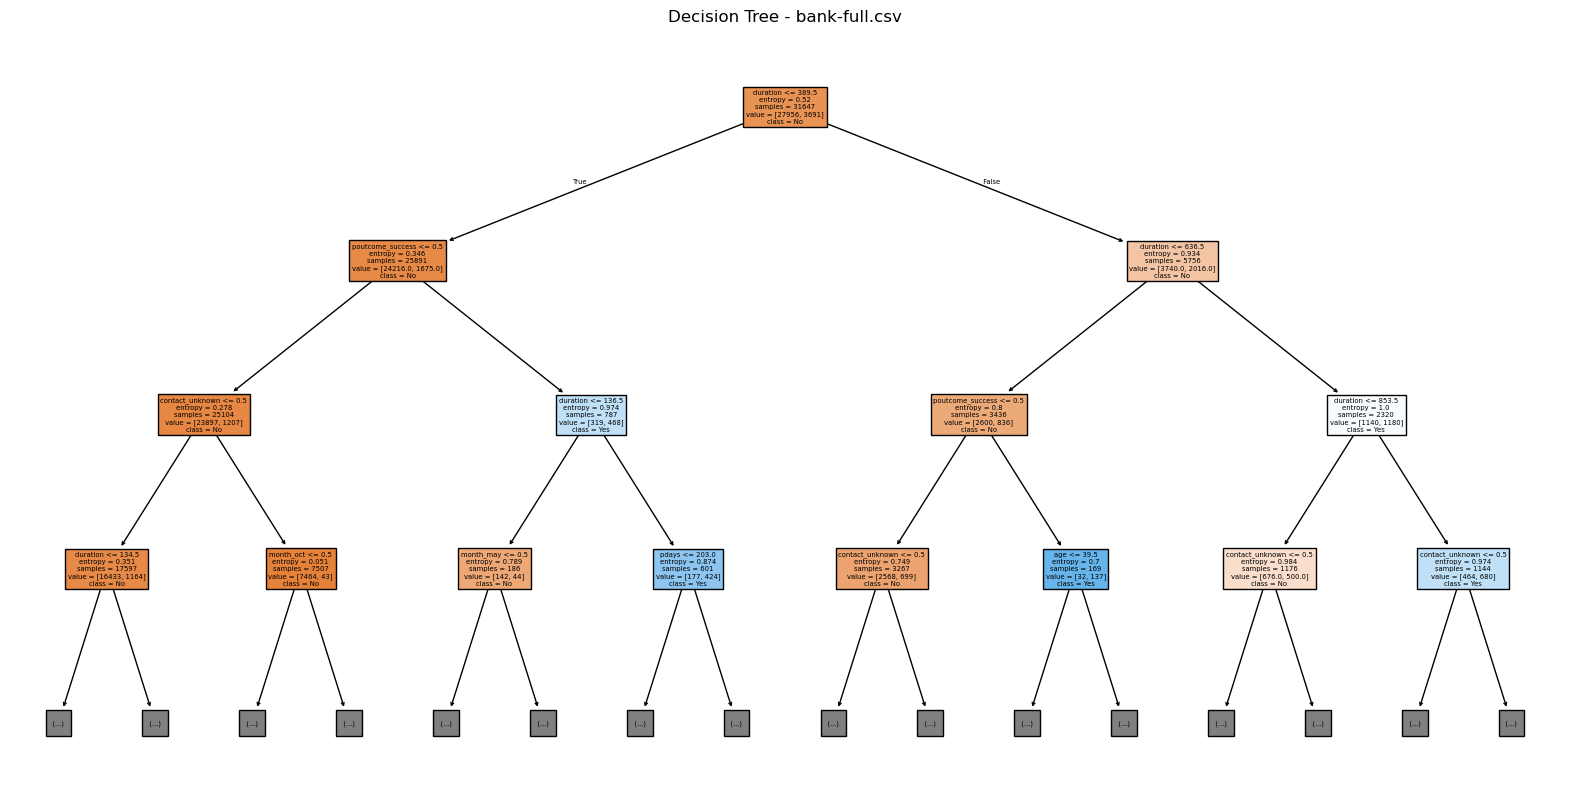

In [14]:
#Visualize One Tree

plt.figure(figsize=(20, 10))
plot_tree(model_2, 
          filled=True, 
          feature_names=X_train_2.columns, 
          class_names=["No", "Yes"],
          max_depth=3)  # Optional: restrict depth for clarity
plt.title("Decision Tree - bank-full.csv")
plt.show()



# CONCLUSION
- `bank.csv` is faster to train, good for quick prototyping.
- `bank-full.csv` offers better generalization and more stable accuracy.
- Both datasets use the same structure, so preprocessing code is reusable.
